In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [3]:
import hdbscan

In [11]:
test_data = np.load('../npy/nuclei57.txt.r1.s2.clusterable_embedding.npy')
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

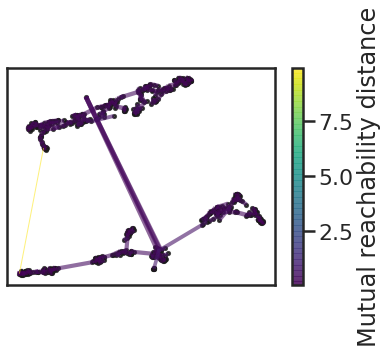

In [13]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=10,
                                      edge_linewidth=1)

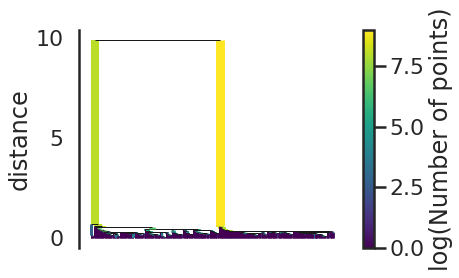

In [14]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

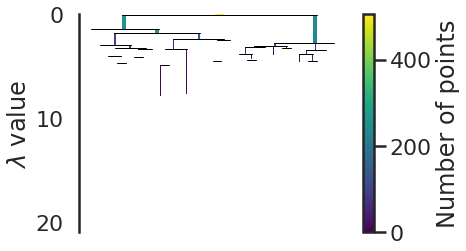

In [15]:
clusterer.condensed_tree_.plot()

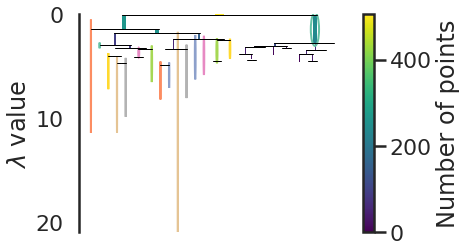

In [39]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("Set2",len(clusterer.labels_)))

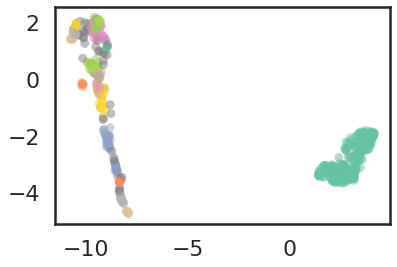

In [38]:
palette = sns.color_palette("Set2",len(clusterer.labels_))
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)